In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../0_DataPreparation/00_data/data_long.csv")
df

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12,zwischen_den_jahren,Number_of_ships_scaled,Cloud_ok,Wind_ok
0,2013-07-01,148.828353,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,0,1
1,2013-07-02,159.793757,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,1,1
2,2013-07-03,111.885594,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,0,1
3,2013-07-04,168.864941,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,0,1
4,2013-07-05,171.280754,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,2017-12-21,87.471228,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0.0,0,1
9330,2017-12-22,71.911652,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0.0,0,1
9331,2017-12-23,84.062223,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0.0,0,0
9332,2017-12-24,60.981969,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0.0,0,0


In [39]:
df_subset = df.loc[1819:(1818*2), ['Datum', 'Umsatz', 'Sommer']]
df_subset

,Datum,Umsatz,Sommer
1819,2013-07-01,535.856285,1
1820,2013-07-02,546.780787,1
1821,2013-07-03,427.343259,1
1822,2013-07-04,454.859641,1
1823,2013-07-05,492.818804,1
...,...,...,...
3632,2018-07-26,628.287763,1
3633,2018-07-27,677.415844,1
3634,2018-07-28,716.576825,1
3635,2018-07-29,721.822447,1


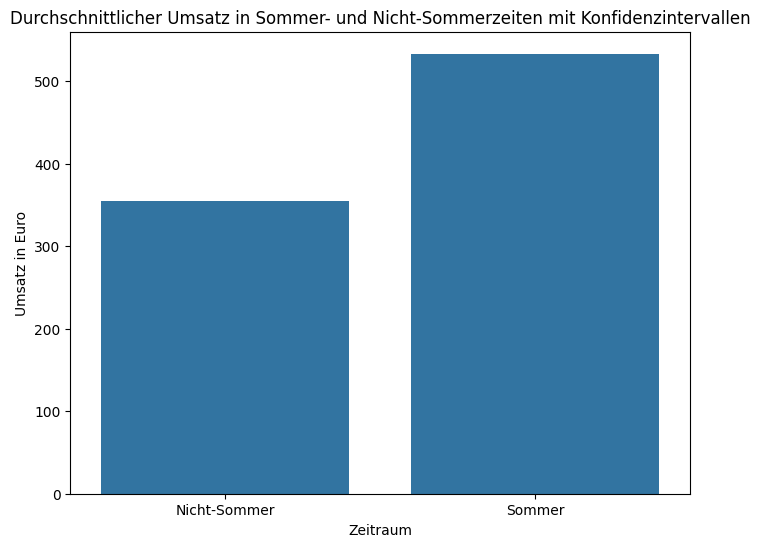

In [45]:


# Durchschnittsumsätze basierend auf Sommer und Nicht-Sommer berechnen
data_sommer = df_subset.groupby('Sommer').mean(numeric_only=True).reset_index()

# Balkendiagramm mit seaborn erstellen und Konfidenzintervalle hinzufügen
plt.figure(figsize=(8, 6))
sns.barplot(data=data_sommer, x='Sommer', y='Umsatz', errorbar=('ci', 95))  # 95% Konfidenzintervall

# Achsenbezeichner und Titel hinzufügen
plt.xticks(ticks=[0, 1], labels=['Nicht-Sommer', 'Sommer'])
plt.xlabel('Zeitraum')
plt.ylabel('Umsatz in Euro')
plt.title('Durchschnittlicher Umsatz in Sommer- und Nicht-Sommerzeiten mit Konfidenzintervallen')

# Diagramm anzeigen
plt.show()


/tmp/ipykernel_1643442/531851559.py:18: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




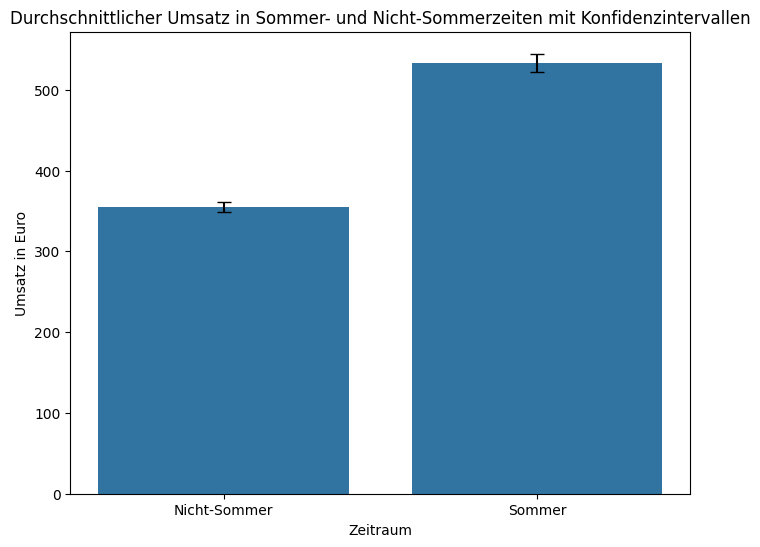

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Beispiel-Datensatz (hier wird angenommen, dass der DataFrame df bereits geladen wurde)
df_subset = df.loc[1819:3636, ['Datum', 'Umsatz', 'Sommer']]  # Bereich anpassen, falls nötig

# Berechnung der Mittelwerte und der Konfidenzintervalle
data_sommer = df_subset.groupby('Sommer')['Umsatz'].agg(['mean', 'sem']).reset_index()

# Berechne das 95% Konfidenzintervall
data_sommer['ci_lower'] = data_sommer['mean'] - 1.96 * data_sommer['sem']
data_sommer['ci_upper'] = data_sommer['mean'] + 1.96 * data_sommer['sem']

# Balkendiagramm mit Fehlerbalken (Konfidenzintervalle) erstellen
plt.figure(figsize=(8, 6))
sns.barplot(data=data_sommer, x='Sommer', y='mean', ci=None)

# Fehlerbalken hinzufügen (Konfidenzintervalle)
plt.errorbar(data_sommer['Sommer'], data_sommer['mean'], 
             yerr=[data_sommer['mean'] - data_sommer['ci_lower'], 
                   data_sommer['ci_upper'] - data_sommer['mean']], 
             fmt='none', c='black', capsize=5)

# Achsenbezeichner und Titel hinzufügen
plt.xticks(ticks=[0, 1], labels=['Nicht-Sommer', 'Sommer'])
plt.xlabel('Zeitraum')
plt.ylabel('Umsatz in Euro')
plt.title('Durchschnittlicher Umsatz in Sommer- und Nicht-Sommerzeiten mit Konfidenzintervallen')

# Diagramm anzeigen
plt.show()
